In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
books = pd.read_csv('../datasets/CleanDataBook.csv')
users = pd.read_csv('../datasets/Users.csv')
ratings = pd.read_csv('../datasets/Ratings.csv')

C:\Users\Syah\AppData\Local\Temp\ipykernel_18360\3079379235.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('../datasets/CleanDataBook.csv')


In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,idPerpus
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,213
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,913
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,913
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,213
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,213


In [4]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,idPerpus
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,213
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,913
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,913
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,213
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,213


In [7]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 6)
(1149780, 3)
(278858, 3)


In [8]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
idPerpus               0
dtype: int64

In [9]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [11]:
books.duplicated().sum()

0

In [12]:
ratings.duplicated().sum()

0

In [13]:
users.duplicated().sum()

0

## Popularity Based Recommender System

In [14]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [15]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [16]:
# avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
# avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
# avg_rating_df

avg_rating_df = ratings_with_name.groupby('Book-Title')['Book-Rating'].mean().round(1).reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg_rating'},inplace=True)
avg_rating_df

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.2
1,Always Have Popsicles,0.0
2,Apple Magic (The Collector's series),0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.0
4,Beyond IBM: Leadership Marketing and Finance ...,0.0
...,...,...
241066,Ã?Â?lpiraten.,0.0
241067,Ã?Â?rger mit Produkt X. Roman.,5.2
241068,Ã?Â?sterlich leben.,7.0
241069,Ã?Â?stlich der Berge.,2.7


In [17]:
popular_df = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_df

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.2
1,Always Have Popsicles,1,0.0
2,Apple Magic (The Collector's series),1,0.0
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.0
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.0
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.0
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.2
241068,Ã?Â?sterlich leben.,1,7.0
241069,Ã?Â?stlich der Berge.,3,2.7


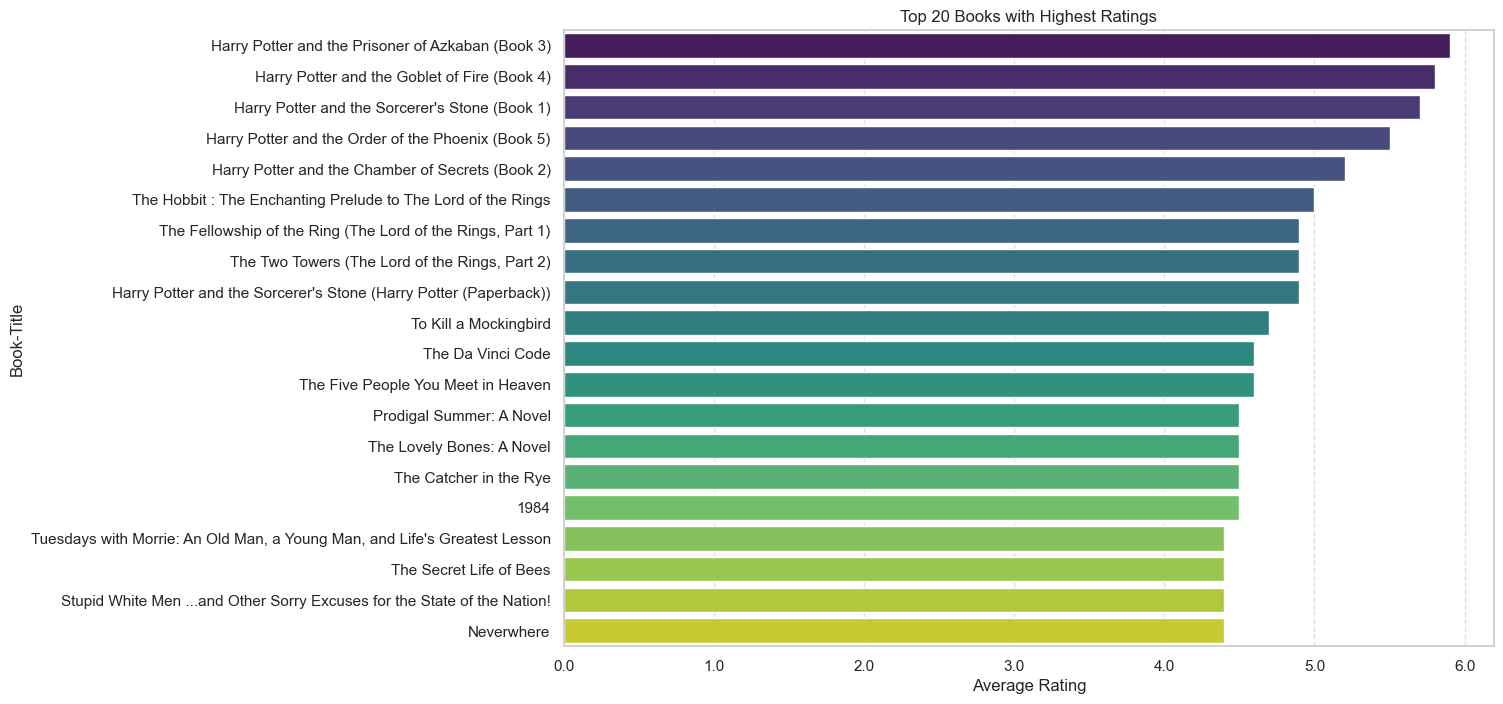

In [51]:
# Filter and sort the DataFrame
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('avg_rating', ascending=False).head(20)

# Set Seaborn style
sns.set(style="whitegrid")

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='avg_rating', y='Book-Title', data=popular_df, palette='viridis')

# Customize the plot
plt.xlabel('Average Rating')
plt.title('Top 20 Books with Highest Ratings')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Set the format of x-axis ticks to display one decimal point
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

# Display the plot
plt.show()

In [41]:
#we change head to 100, because cc team request to display 100 book
popular_df = popular_df[popular_df['num_ratings']>=250].sort_values('avg_rating',ascending=False).head(100)

In [19]:
popular_df = popular_df.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','num_ratings','avg_rating']]

In [36]:
display(popular_df)

,Book-Title,Book-Author,num_ratings,avg_rating
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,428,5.9
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,387,5.8
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,278,5.7
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,347,5.5
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,556,5.2
...,...,...,...,...
338,Angela's Ashes (MMP) : A Memoir,Frank McCourt,326,3.3
339,Snow Falling on Cedars,David Guterson,662,3.3
346,Dance upon the Air (Three Sisters Island Trilogy),Nora Roberts,258,3.3
347,The Witching Hour (Lives of the Mayfair Witches),ANNE RICE,274,3.3


# Collaborative Filtering Based Recommender System

In [20]:
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
user_like = x[x].index

In [21]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(user_like)]

In [22]:
y = filtered_rating.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [23]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [24]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [25]:
pt.fillna(0,inplace=True)

In [26]:
pt

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
similarity_scores = cosine_similarity(pt)

In [28]:
similarity_scores.shape

(706, 706)

In [29]:
def recommend(book_name):
    # index fetch
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        
        data.append(item)
    
    return data

In [44]:
recommend('Harry Potter and the Prisoner of Azkaban (Book 3)')

[['Harry Potter and the Goblet of Fire (Book 4)', 'J. K. Rowling'],
 ['Harry Potter and the Chamber of Secrets (Book 2)', 'J. K. Rowling'],
 ['Harry Potter and the Order of the Phoenix (Book 5)', 'J. K. Rowling'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)", 'J. K. Rowling']]

In [31]:
pt.index[1]

'1st to Die: A Novel'

In [32]:
display(books)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,idPerpus
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,213
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,913
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,913
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,213
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,213
...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),173
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,213
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,213
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,213


In [33]:
books.drop_duplicates('Book-Title')

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,idPerpus
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,213
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,913
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,913
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,213
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,213
...,...,...,...,...,...,...
271354,0449906736,Flashpoints: Promise and Peril in a New World,Robin Wright,1993,Ballantine Books,213
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,213
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,213
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,213


In [34]:
import pickle
pickle.dump(popular_df,open('../script_deployment/model/popular.pkl','wb'))
pickle.dump(pt,open('../script_deployment/model/pt.pkl','wb'))
pickle.dump(books,open('../script_deployment/model/books.pkl','wb'))
pickle.dump(similarity_scores,open('../script_deployment/model/similarity_scores.pkl','wb'))